<a href="https://colab.research.google.com/github/JNSDKV/EDA-2/blob/main/Copy_of_Copy_of_Sample_EDA_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.
https://github.com/JNSDKV/EDA-2/blob/main/Copy_of_Copy_of_Sample_EDA_Submission_Template.ipynb

# **Problem Statement**


**Write Problem Statement Here.**

#### **Define Your Business Objective?**

Answer Here.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno #(import for missing value visualization)

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# lets load dataset and store into variable as airbnb.
airbnb= pd.read_csv('/content/Airbnb NYC 2019.csv')

### Dataset First View

In [4]:
# Dataset First Look

#To check dataset we can use-: 
#1. head()- gives rows from upper
#2. tail()- gives rows from lower
#3. sample()- gives rows randomly(useful for check bias in dataset)

In [5]:
airbnb.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaN,NaN,1.0,365.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0


In [6]:
airbnb.tail(4)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
43423,33644836,"Priv room in an immaculate Apt,near Cent Park,...",76628403.0,Matt,Manhattan,Upper West Side,40.77961,-73.97821,Private room,160.0,2.0,3.0,2019-06-30,1.13,1.0,61.0
43424,33645301,1718公馆套房,119692067.0,Qiulan,Brooklyn,Sunset Park,40.64403,-74.00087,Private room,60.0,1.0,0.0,NaN,NaN,3.0,89.0
43425,33645723,Cute private room in Washington Heights!,112531390.0,Rachel,Manhattan,Washington Heights,40.84427,-73.93742,Private room,52.0,1.0,1.0,2019-04-25,0.40,1.0,0.0
43426,33650779,Central Manhattan Ladies Only (S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
# To check dataset rows and columns use-:
# 1. shape- gives count of rows and column in tuple form (rows,columns)
# 2. len()- only give no of rows
len(airbnb)

43427

In [8]:
airbnb.shape

(43427, 16)

### Dataset Information

In [14]:
# Dataset Info
# Info function will give high level information about dataset like-:
# 1. total no of columns
# 2. total no of missing value present in each columns
# 3. datatype of data present in each columns
# 4. gives memory occupy of dataset in ram

In [15]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43427 entries, 0 to 43426
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              43427 non-null  int64  
 1   name                            43411 non-null  object 
 2   host_id                         43426 non-null  float64
 3   host_name                       43405 non-null  object 
 4   neighbourhood_group             43426 non-null  object 
 5   neighbourhood                   43426 non-null  object 
 6   latitude                        43426 non-null  float64
 7   longitude                       43426 non-null  float64
 8   room_type                       43426 non-null  object 
 9   price                           43426 non-null  float64
 10  minimum_nights                  43426 non-null  float64
 11  number_of_reviews               43426 non-null  float64
 12  last_review                     

#### Duplicate Values

In [19]:
# Dataset Duplicate Value Count-:

# to check duplicate value use duplicated()function.it will give result in boolean.
# Use sum() function with duplicated() gives total no of duplicated values.

airbnb.duplicated().sum()

0

#### Missing Values/Null Values

In [25]:
# Missing Values/Null Values Count
airbnb.isnull().sum()

id                                   0
name                                16
host_id                              1
host_name                           22
neighbourhood_group                  1
neighbourhood                        1
latitude                             1
longitude                            1
room_type                            1
price                                1
minimum_nights                       1
number_of_reviews                    1
last_review                       7374
reviews_per_month                 7374
calculated_host_listings_count       1
availability_365                     1
dtype: int64

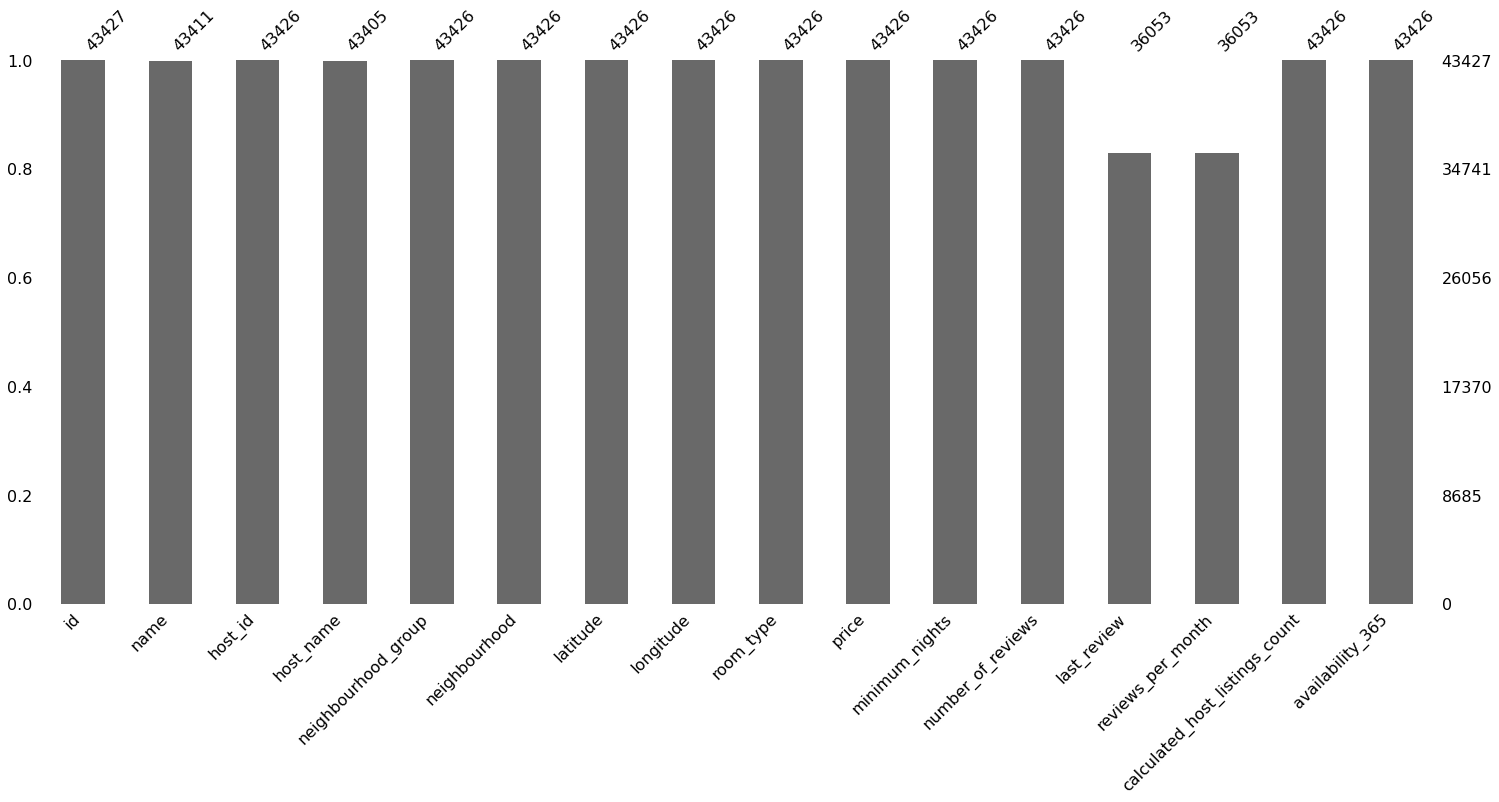

In [26]:
# Visualizing the missing values

# To visualize missing values we have to import missingno library-:

msno.bar(airbnb) # This is code to visualize missing values.Here i am using bar graph we can use other graph also like heatmap etc.

### What did you know about your dataset?

Information that i got from this dataset-:

* In this dataset there is rows=48895,colun=16
* There is 3 types of Dtype present in this dataset i.e int64(7),object(6),float64(3).
* No duplicated value present in this dataset.
* There is some missing values present in reviews_per_month,number_of_reviews	and host_name column.

## ***2. Understanding Your Variables***

In [34]:
# Dataset Columns
airbnb.columns

Index(['name', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [28]:
# Dataset Describe
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.342700e+04,4.342600e+04,43426.000000,43426.000000,43426.000000,43426.000000,43426.000000,36053.000000,43426.000000,43426.000000
mean,1.699204e+07,5.707059e+07,40.728723,-73.952508,149.571777,7.026136,25.957951,1.281800,6.312762,106.566159
std,9.953051e+06,6.782592e+07,0.054399,0.045207,237.780407,20.968537,46.572629,1.624674,28.468985,130.337427
min,2.539000e+03,2.438000e+03,40.499790,-74.242850,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,8.369551e+06,6.948271e+06,40.689600,-73.982680,69.000000,1.000000,1.000000,0.170000,1.000000,0.000000
50%,1.745693e+07,2.591267e+07,40.722470,-73.955650,105.000000,3.000000,7.000000,0.610000,1.000000,32.000000
75%,2.553793e+07,8.414183e+07,40.763220,-73.937170,175.000000,5.000000,28.000000,1.900000,2.000000,213.000000
max,3.365078e+07,2.575691e+08,40.911690,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Variables Description 

Answer Here

### Check Unique Values for each variable.

In [35]:
# Check Unique Values for each variable.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [37]:
# Write your code to make your dataset analysis ready.
airbnb.drop(['id','host_name','last_review'], axis=1, inplace=True)

airbnb.head(5)

KeyError: ignored

In [38]:
airbnb.fillna({'reviews_per_month':0},inplace=True)

airbnb.reviews_per_month.isnull().sum()

0

In [39]:
airbnb.isnull().sum()

name                              16
host_id                            1
neighbourhood_group                1
neighbourhood                      1
latitude                           1
longitude                          1
room_type                          1
price                              1
minimum_nights                     1
number_of_reviews                  1
reviews_per_month                  0
calculated_host_listings_count     1
availability_365                   1
dtype: int64

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [40]:
airbnb.head(1)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787.0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,0.21,6.0,365.0


In [41]:
# Chart - 1 visualization code

In [42]:
airbnb.groupby('neighbourhood_group')['neighbourhood'].count().sort_values(ascending=False)

neighbourhood_group
Manhattan        19095
Brooklyn         18275
Queens            4829
Bronx              903
Staten Island      324
Name: neighbourhood, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


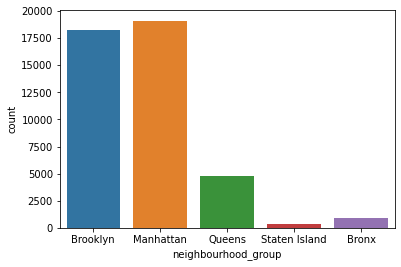

In [43]:
sns.countplot(airbnb.neighbourhood_group)
plt.show()
plt.show()

##### 1. Why did you pick the specific chart?

1. Because we are doing univariate analysis on categorical Column.
2. For categorical variables Bar chart is best option.
3. For doing comparision on categorical variables Bar chart is best.

##### 2. What is/are the insight(s) found from the chart?

1. There are 5 neighbourhood_group(Location) where airbnb nyc apartments are available.
2. Manhattan is the place where no of apartments are more in compared to others.
3. Staten island is the place where least no of apartments are available.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, I think gained insights helps to create positive impact on business.

* If airbnb target other locations like Staten Island ,Queens and Bronx for listing more apartments,along with if given any offer on booking for those locations then there is a chance that guests can prefer those locations also for booking.
* If booking increases by doing this then there will be growth in the business.

#### Chart - 2

In [44]:
# Chart - 2 visualization code

In [45]:
df=airbnb.host_id.value_counts(ascending=False).head(10).reset_index().set_index('index')
df

,host_id
index,
107434423.0,192
219517861.0,176
30283594.0,119
12243051.0,96
16098958.0,96
137358866.0,88
61391963.0,88
22541573.0,85
200380610.0,65


In [46]:
df.rename(columns={'index':'host_id','host_id':'no_of_listings'},inplace='True')
df

,no_of_listings
index,
107434423.0,192
219517861.0,176
30283594.0,119
12243051.0,96
16098958.0,96
137358866.0,88
61391963.0,88
22541573.0,85
200380610.0,65


In [47]:
sns.barplot(data=df,x='index',y='no_of_listings')
plt.xticks(rotation='vertical')
plt.show()

ValueError: ignored

##### 1. Why did you pick the specific chart?

Answer Here.

In [ ]:
1. For doing comparision  Bar chart is best.
2. Bar chart will keep categories  on one axis and respective values on another axis,so we can do comparision easily.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

In [ ]:
airbnb.head(1)

#### Chart - 3

In [ ]:
# Chart - 3 visualization code
df1= airbnb['room_type'].value_counts().reset_index()

In [ ]:
df1.rename(columns={'index':'room_type','room_type':'counts'},inplace=True)
df1

In [ ]:
plt.figure(figsize=(7,7))
sns.barplot(data=df1,x='room_type',y='counts')
plt.show()

In [ ]:
airbnb['room_type'].value_counts().plot(kind='pie',autopct='%0.1f%%')
plt.show()

##### 1. Why did you pick the specific chart?

FOR BAR CHART-:

1. we can use bar chart for comparision between categorical variables.

FOR PIE CHART-:
 
1. Here i want to see the distribution in percentage of entire room types indivisually,for this reason i used pie chart.


##### 2. What is/are the insight(s) found from the chart?

Insights-:
1. There are 3 types of room type available.
  * entire home/apt
  * private room
  * shared room
2. The sequence of room type available is
    Entire room > private room > shared room
3. The contribution of Entire room is 52% ,private room is 45.7% and shared room is 2.4%.     

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* yes, the gained insights can help for business-:
* Here we can say that contribution of entire rooms and private rooms are more,means there is more demand of these rooms,so we can increase the no of count of these rooms.

In [ ]:
airbnb.head(2)

#### Chart - 4

In [ ]:
airbnb.sample(3)

In [ ]:
# Chart - 4 visualization code

plt.figure(figsize=(8,8))
airbnb['minimum_nights'].value_counts().sort_values(ascending=False).head(20).plot(kind='bar')
plt.show()

plt.figure(figsize=(8,8))
airbnb['minimum_nights'].value_counts().sort_values(ascending=False).head(8).plot(kind='pie',autopct='%0.1f%%')
plt.show()

##### 1. Why did you pick the specific chart?

* I picked bar chart because bar chart keep categories in one axis and respective values in another axis so will do comparision easily. 
* when there is too many categories to draw, In this case bar chart is give better comparision.
* But here i used pie chart also in limited categories to just see the contribution of apartments that we have to booked for minimum how many days.

##### 2. What is/are the insight(s) found from the chart?

1. There are many apartments which contribute 28.1% for minimum of one night, 25.8% for two nights and 17.6% for three nights etc. which we can book for.
2. There are many apartments where minimum night for booking is very high.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Insights which create positive business growth-:

* On the basis of insights we can increase the number of listing of apartments where booking for minimum nights is 1 or 2. Because peoples would not like to book those apartments whose minimum nights for staying is high.
* So if there will be no burden of minimum night staying at the apartments then there is a chance for more booking.

According to my point of view there is some insights which lead to negative growth of business.

* There are some 8.3% apartments where we can book for minimum 30 days and many more apartments where minimum night for booking is very high.
* There are very less peoples who prefer for booking apartments where minimum night for staying is very high.
* If any apartments are not vacant whose minimum night for staying is less in this time if new peoples comes and he/she doesn't prefer those apartments whose minimum night staying is high then definitely he/she will give negative reviews.
* All these negative reviews will put negative impact on business.

#### Chart - 5

In [ ]:
# Chart - 5 visualization code
sns.scatterplot(data=airbnb,x=airbnb['latitude'],y=airbnb['longitude'],hue='neighbourhood_group')
plt.show()

##### 1. Why did you pick the specific chart?

* I picked this chart because we are doing bivariate analysis on both numerical columns.
* For numerical-numerical Scatter plot is the best option.
* I just want to know the correlation between both the variables and Scatterplot gives correlation between numerical columns.

##### 2. What is/are the insight(s) found from the chart?

* We can clearly see in scatter plot that Manhattan has very densed bcoz more apartment in Manhattan and Staten Island is very less densed.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

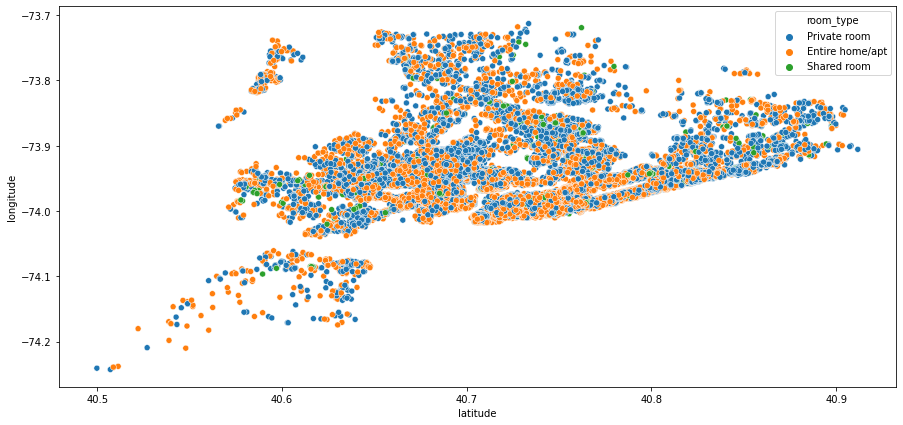

In [48]:
# Chart - 6 visualization code
plt.figure(figsize=(15,7))
sns.scatterplot(data=airbnb,x=airbnb['latitude'],y=airbnb['longitude'],hue='room_type')
plt.show()

##### 1. Why did you pick the specific chart?

* I picked up this chart i want to know the correlation between the numerical columns.
* scatter plot gives correlation between two numerical columns.
* Here i used hue---> it will add extra information on chart mostly in hue parameter categorical variable passes.

##### 2. What is/are the insight(s) found from the chart?

Insights-:
* There are very less no of listing of shared rooms compare to others.
* There are more densed area found at medium level of lattitude and longitude.
* private rooms are more densed at high lattitude.
* There are certain private and entire rooms which are available at high longitude.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

yes, gained insights help to create posive business growth-:
* There is certain areas which is more demanded and listing of apartment is also more.
* This will help to take decision for where listing should be more or less.

In [49]:
airbnb.head(3)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787.0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,0.21,6.0,365.0
1,Skylit Midtown Castle,2845.0,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,0.38,2.0,355.0
2,THE VILLAGE OF HARLEM....NEW YORK !,4632.0,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,0.00,1.0,365.0


#### Chart - 7

In [ ]:
airbnb.head(2)

In [ ]:
# Chart - 7 visualization code
# this code will give me all the apartments where minimum nights for booking is 30 at Manhattan.
airbnb[(airbnb['neighbourhood_group']=='Manhattan') & (airbnb['minimum_nights']==30)].shape[0]



In [ ]:
df1=airbnb[(airbnb['neighbourhood_group']=='Manhattan') & (airbnb['minimum_nights']==30)]


In [ ]:
df2=df1['neighbourhood_group'].value_counts().reset_index()
sns.barplot(data=df2,x='index',y='neighbourhood_group')


##### 1. Why did you pick the specific chart?

* I picked bar chart because it will give categorical variable on one axis and corresponding value on another axis.

##### 2. What is/are the insight(s) found from the chart?

Insights-:

* There are 2399 apartments which are located in Manhattan for minimum nights booking is 30. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes definitely gained insights will impact on business for growing

* Here Manhattan is the place where peoples would like to stay more among others place.
* But there is 2399 apartments in Manhattan where booking for minimum nights is 30. which most peoples wouldn't like to book that type of apartments.so airbnb should list those apartments which has minimum nights for staying is less.
* Because any guest wouldn't getting apartments which has less minimum nights stay those guest shouldn't leave because of apartments which has minimum nights staying is more.

In [ ]:
airbnb.shape

#### Chart - 8

In [ ]:
# Chart - 8 visualization code
# This code will give all the rooms which are not available for 365 days and convert it into dataframe.
df2=airbnb[airbnb['availability_365']==0].groupby('room_type').count()['availability_365'].reset_index()

In [ ]:
df2

In [ ]:
sns.barplot(data=df2,x=df2['room_type'],y=df2['availability_365'])

In [ ]:
plt.figure(figsize=(15,7))
plt.pie(df2['availability_365'],labels=df2['room_type'],autopct='%0.1f%%',explode=[0,0,0.5],shadow=True)
plt.show()

##### 1. Why did you pick the specific chart?

* I used bar chart because i want to compare the room_type corresponding to availability.
* I picked pie chart because pie chart gives contribution of each categories indivisually.

##### 2. What is/are the insight(s) found from the chart?

* First of all i wrote the code for availability column and i got  those values which is not available 365 days.
* I got to know that in every categories there are some rooms which are not available for 365 days.
* Like 50.6% of Entire room is not available for 365 days, 47.7% of private room and 1.7% of shared room which are not available for 365 days.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* Yes insights help to create positive business. Here are some points if followed by airbnb then it could be heplfull for business growth.

* I think there should be listing for those rooms which are available for 365 days.
* Because of this guest will gets rooms for 365 days and they satisfied for airbnb services and give good reviews.

In [ ]:
airbnb.head(3)

#### Chart - 9

In [ ]:
# Chart - 9 visualization code
plt.figure(figsize=(12,8))
airbnb.groupby('neighbourhood_group')['number_of_reviews'].sum().sort_values(ascending=False).plot(kind='pie',autopct='%0.1f%%',explode=[0.1,0,0,0,0.1],shadow=True)
plt.show()

##### 1. Why did you pick the specific chart?

* I picked pie chart because it will give contribution of each categories on a standard scale.
* In pie chart we can draw graph between numerical and categorical columns.

##### 2. What is/are the insight(s) found from the chart?

* The above graph shows that Brooklyn has got maximum no of reviews,and Staten island has minimum no of reviews.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, definitely from the insights which i got from the chart could be helpful for business growth.
* There are some neighbourhood_group where peoples wouldn't like to give reviews.We have to find out root causes why peoples wouldn't like these neighbourhood_group.According to that airbnb has to take some action on this and resolve the problems that will help to business growth.

In [ ]:
airbnb.head(3)

#### Chart - 10

In [ ]:
# Chart - 10 visualization code
sns.scatterplot(airbnb['price'],airbnb['number_of_reviews'])
plt.show()

##### 1. Why did you pick the specific chart?

* I picked up this graph because i want to see the correlation between numerical vs numerical column.
* Scatter plot gives the correlation between numerical vs numerical column.

##### 2. What is/are the insight(s) found from the chart?

* From above graph we can clearly see that most no of reviews we are getting at low price.
* So we can say that peoples would like to book that apartments whose price is low.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, Here are points which could be impact on business growth-:
* airbnb nyc should listing those type of apartments whose price is low.
* Because peoples are more interested to book those apartments whose price is low.
* If apartments will be available at low price then definitely chances for booking more apartments that will impact on business growth. 

In [ ]:
airbnb.head(3)

#### Chart - 11

In [ ]:
# Chart - 11 visualization code
airbnb.groupby('neighbourhood_group')['price'].mean().reset_index()

In [ ]:
sns.barplot(data=airbnb,x='neighbourhood_group',y='price')

##### 1. Why did you pick the specific chart?

* I used Bar graph because Bar plot compare between categorical columns with their respective values.

##### 2. What is/are the insight(s) found from the chart?

Insights-:

* The average price of living at NYC, Manhattan is the costliest place to live.
* The average price of Queens and Bronx are nearly equal.
* The average price of Brooklyn and Staten Island are nearly equal.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

yes,gained insights could be create a positive business impact-:
* There are some neighbourhood_group where peoples wouldn't like to book the apartments, inspite of that those apartments are available for booking at high price.
* But peoples would love to book low price apartments,if airbnb has reduce price for booking for those neighbourhood_group where peoples are not booking more apartments.
* After that reduced price may be the key factor for bringing more peoples.

In [ ]:
airbnb.head(3)

#### Chart - 12

In [ ]:
#plt.figure(figsize=(9,7))
sns.stripplot(data=airbnb,x='neighbourhood_group',y='reviews_per_month',hue='room_type',dodge=True)
plt.show()

##### 1. Why did you pick the specific chart?

* I used this plot because Stripplot plot between categorical and numerical columns.
* I want to see the Scatter plot of categorical columns for this reason i used stripplot.

##### 2. What is/are the insight(s) found from the chart?

Insights-:

* Reviews per month in Manhattan,Brooklyn,Staten Island,Bronx are equal for Private as well as Entire home/apt.
* But Reviews per month is more in Queens for Private room as compared to Entire home/apt.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

yes, Here are some points which impact on business growth-:
* Here more no of reviews_per_month is getting private room at Queens but Manhattan is such a place where peoples more like to booking.
* Peoples also more like to booking private rooms.
* According to this Manhattan should have getting more no of reviews_per_month.
* There is some problem which made guest unhappy.Airbnb has to resolve that problem and make guest happy so reviews_per_month will increase and it will help to business growth. 

In [ ]:
airbnb.head(3
            )

#### Chart - 13

In [ ]:
# Chart - 13 visualization code
sns.barplot(data=airbnb,x=airbnb['neighbourhood_group'],y=airbnb['price'],hue='room_type')

In [ ]:
sns.barplot(data=airbnb,x=airbnb['neighbourhood_group'],y=(airbnb['host_id'].count()),hue='room_type')

##### 1. Why did you pick the specific chart?

* Bar graph is used for comparision between the categorical columns with their respective values.
* Here categorical column is neighbourhood group and values on the basis of comparision is price.
* I used hue--> hue is used to add addtional information on the same chart.

##### 2. What is/are the insight(s) found from the chart?

Insights-:

* Price of Entire home/apt in Manhattan is more as compared to others.
* Price of Entire home/apt in Brooklyn and Staten Island is approx equal.
* Price of Entire home/apt in Queens and Bronx is approx equal.
* Price of Private room in Manhattan is high as compared to others.
* Price of Private room in Brooklyn,Queens,Staten Island and Bronx is approx equal.
* Price of Shared room in Brooklyn is less as compared to others.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, There are some points which can be useful for business growth-:
* Peoples would like to book private rooms instead of shared rooms at all the neighbourhood_group it may be due to the price because at all neighbourhood_group there is not so much price difference between private and shared rooms.
* But i think there has to more price difference between private and shared rooms.
* If the price of shared rooms will be less then there will be chance for more booking and business growth.

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
fig=plt.subplots(figsize=(10,8))
sns.heatmap(airbnb.corr(),annot= True)
plt.show()

##### 1. Why did you pick the specific chart?

* I want to see the correlation between all the columns in one go.
* Heat map will give the correlation between columns in a single chart, for this reason i used heatmap.

##### 2. What is/are the insight(s) found from the chart?

Insights-:

* There is strong correlation between reviews per month and number of reviews.
* There is slightly correlation among host_id to reviews_per_month & availability_365.
* Slightly correlation between calculated_host_listings_count and availability_365.
* There is noticiable correlation between availability_365 & reviews_per_month .

#### Chart - 15 - Pair Plot 

In [ ]:
airbnb.head(3)

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***